# Machine Learning using PyCaret

In [74]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Importing data
df=pd.read_csv(r'C:\Users\13433\Downloads\UniversalBank.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [76]:
# Visualization library called sweetviz. It generates a .html which gives you various plots and statistical information about
# your data
import sweetviz as sv
report=sv.analyze(df)
report.show_html()

:FEATURES DONE:                    |                     | [  0%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [77]:
# dropping duplicates
df=df.drop_duplicates()

In [78]:
# dropping ID and ZIPCODE as they don't provide us any information
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [79]:
# some values of experience are in negative, so converting them to 0
df[df['Experience']<0]=0

Text(0.5, 1.0, 'Heatmap')

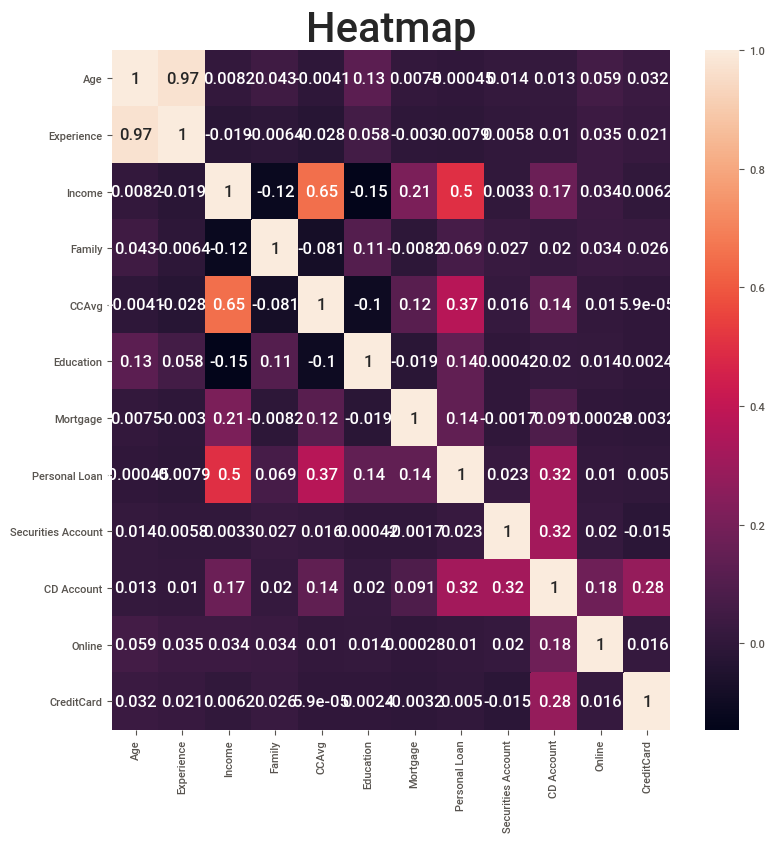

In [80]:
plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap',fontsize=30)

In [81]:
# dropping age as it has high correlation with experience
df.drop(['Age'],axis=1,inplace=True)

In [82]:
# using pycaret library. if not installed - pip install pycaret
from pycaret.classification import *

In [117]:
# setting up various parameters for our classifiers
clf=setup(df,target='CreditCard',numeric_features=['Family','Education','Personal Loan','Securities Account','CD Account','Online'],
normalize=True,remove_outliers=True,remove_multicollinearity=True,multicollinearity_threshold=0.8,feature_selection=True,train_size=0.8)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8825
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(5000, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [118]:
# comparing all 15 models with a single command.
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.744500,0.593800,0.085400,0.934900,0.154900,0.114500
1,Naive Bayes,0.744500,0.586700,0.085400,0.934900,0.154900,0.114500
2,Ridge Classifier,0.744500,0.000000,0.085400,0.934900,0.154900,0.114500
3,Quadratic Discriminant Analysis,0.744500,0.591400,0.085400,0.934900,0.154900,0.114500
4,Linear Discriminant Analysis,0.744500,0.594100,0.085400,0.934900,0.154900,0.114500
5,SVM - Linear Kernel,0.744200,0.000000,0.085400,0.922400,0.154800,0.114000
6,Gradient Boosting Classifier,0.744200,0.616200,0.094000,0.857200,0.167900,0.120400
7,Extreme Gradient Boosting,0.743700,0.611200,0.085400,0.907700,0.154600,0.112900
8,Ada Boost Classifier,0.742900,0.609200,0.088200,0.846100,0.158500,0.113400
9,CatBoost Classifier,0.734200,0.618900,0.114800,0.617500,0.192300,0.115500


In [119]:
# choosing logistic regression as our model
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7500,0.5959,0.1143,0.8571,0.2017,0.1462
1,0.7316,0.6306,0.0286,1.0000,0.0556,0.0408
2,0.7500,0.6078,0.0952,1.0000,0.1739,0.1322
3,0.7421,0.6126,0.0667,1.0000,0.1250,0.0937
4,0.7579,0.5984,0.1238,1.0000,0.2203,0.1698
5,0.7474,0.5525,0.0857,1.0000,0.1579,0.1195
6,0.7500,0.5433,0.1038,1.0000,0.1880,0.1431
7,0.7289,0.5664,0.0377,0.8000,0.0721,0.0482
8,0.7526,0.6376,0.1132,1.0000,0.2034,0.1555
9,0.7342,0.5930,0.0849,0.6923,0.1513,0.0962


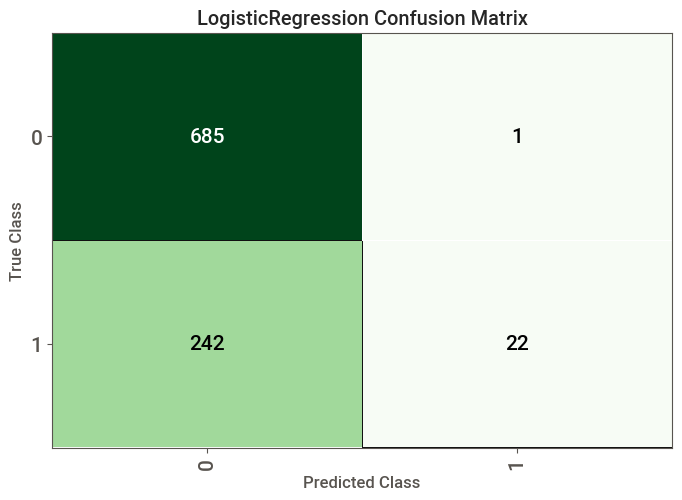

In [120]:
# interesting to notice that only cases exist where our model predicted to give loan when it shouldn't
plot_model(lr,'confusion_matrix')

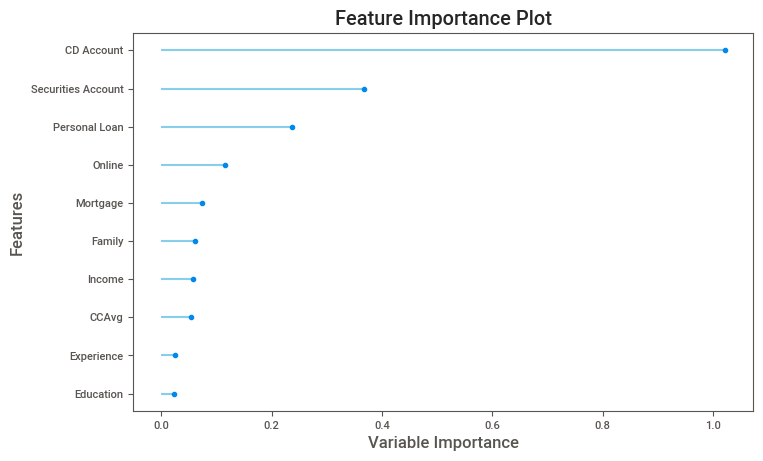

In [121]:
plot_model(lr,'feature')

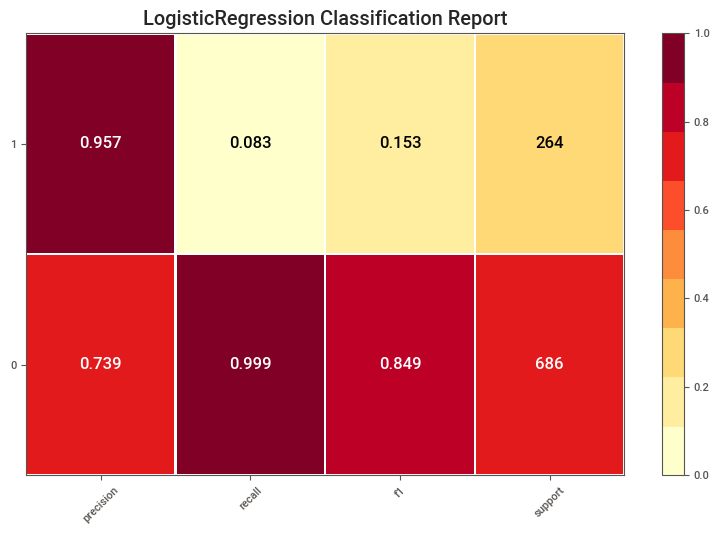

In [122]:
plot_model(lr,'class_report')

In [123]:
# finalizing model
finalize_model(lr)

LogisticRegression(random_state=8825)

In [124]:
# saving model
save_model(lr,'credit approval')

Transformation Pipeline and Model Succesfully Saved


In [125]:
# load model using load_model() next time when you want to use it.
model=load_model('credit approval')

Transformation Pipeline and Model Sucessfully Loaded
